# Carga de datos

Se cargan los datos desde kaggle

In [1]:
api_key = {"username":"edfearay11","key":"32ee59b212abf35f56e9ad705548ad46"}

In [2]:
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [3]:
!pip install kagglehub

import kagglehub

# Descargar el dataset
path = kagglehub.dataset_download("m41k12/imagenes-lima-metropolitana")

print("Dataset descargado en:", path)

100%|██████████| 1.20G/1.20G [00:09<00:00, 143MB/s]

Extracting files...


Dataset descargado en: /root/.cache/kagglehub/datasets/m41k12/imagenes-lima-metropolitana/versions/6


#Búsqueda de hiperparámetros y entrenamiento del modelo

Se usa RandomizedGridSearchCV para encontrar los mejores hiperparámetros.

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from scipy.stats import loguniform
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

csv_file = os.path.join(path, "y_labels_g.csv")
df_labels = pd.read_csv(csv_file)

y = df_labels["label"].values

npy_file = os.path.join(path, "X_features_g.npy")
X = np.load(npy_file)

print("\nShape de X:", X.shape)
print("Shape de y:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(random_state=42))
])

scaler = StandardScaler()

param_distributions = {
    "svm__C": loguniform(1e-2, 1e2),
    "svm__gamma":  loguniform(1e-4, 1e0),
    "svm__kernel": ["rbf"]
}

grid = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42,
    verbose=3
)

grid.fit(X_train, y_train)

print("\nMejores parámetros encontrados:")
print(grid.best_params_)

print("\nMejor score de validación:")
print(grid.best_score_)

y_pred = grid.predict(X_test)

class_names = ["Alto", "Medio", "Bajo"]
print("\nReporte de clasificacion:")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Estatus Socioeconómico")
plt.tight_layout()
plt.show()


#Entrenamiento del modelo

Los hiperparámetros encontrados fueron: C=2.6926, gamma=0.00048095

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9137    0.9498    0.9314      1115
           1     0.8684    0.8229    0.8451       802
           2     0.9382    0.9365    0.9374      1103

    accuracy                         0.9113      3020
   macro avg     0.9068    0.9031    0.9046      3020
weighted avg     0.9106    0.9113    0.9107      3020



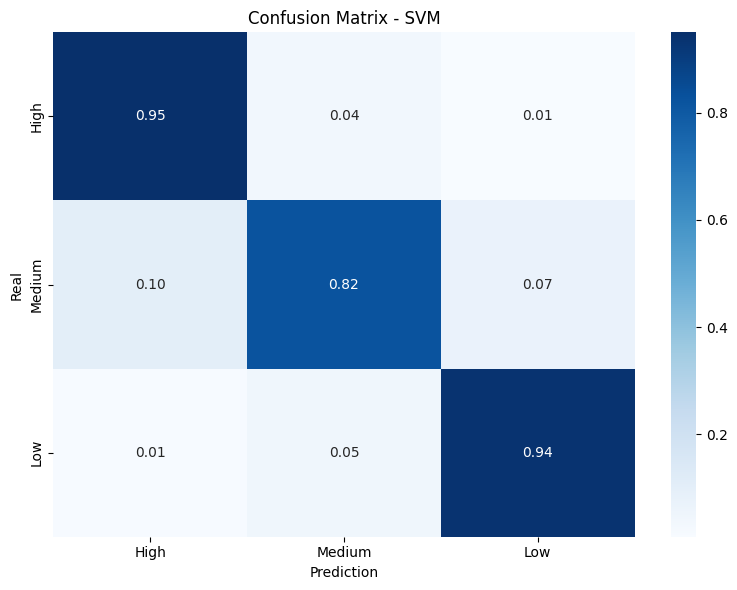

In [5]:
import os
import joblib, numpy as np, pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

CSV_LABELS = os.path.join(path, "y_labels_g.csv")
X_FEATURES = os.path.join(path, "X_features_g.npy")

df = pd.read_csv(CSV_LABELS)
y = df["label"].values
X = np.load(X_FEATURES)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", SVC(C=2.6926, gamma=0.00048095, kernel="rbf", random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

class_names = ["High", "Medium", "Low"]
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title("Confusion Matrix - SVM")
plt.tight_layout()
plt.show()
